<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license bbox plate number detection and reading.

In [1]:
import os
import matplotlib.pyplot as plt

from _paths import current_dir
from nomeroff_net import pipeline
from nomeroff_net.tools import unzip

In [2]:
number_plate_short_detection_and_reading = pipeline("number_plate_short_detection_and_reading", image_loader="opencv")

YOLOv5 🚀 v6.0-154-gb8a4bab torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients


In [6]:
result = number_plate_short_detection_and_reading([
    os.path.join(current_dir, './images/example2.jpeg'),
])

In [7]:
(images, images_bboxs, zones, texts) = unzip(result)

['RP70012', 'JJF509']


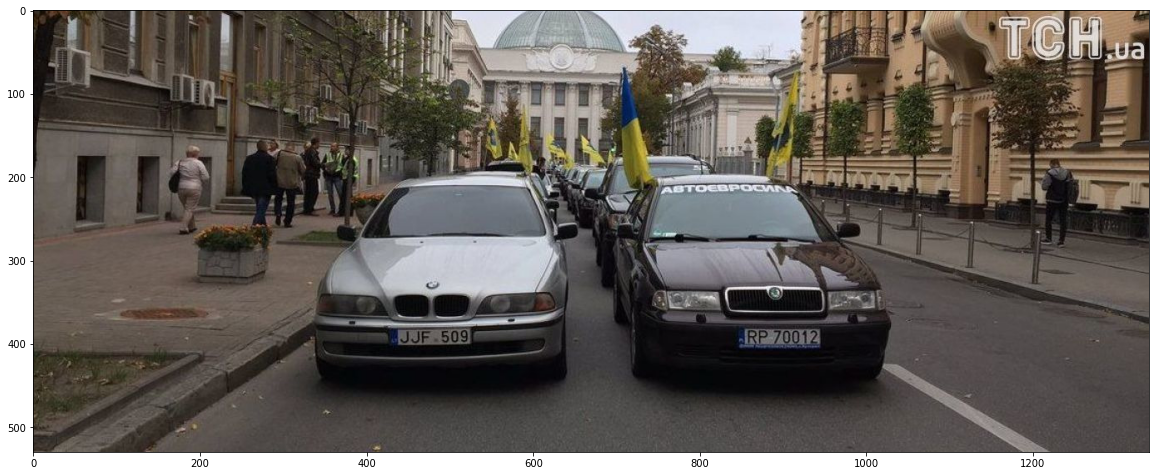

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, np in zip(images, texts):
    print(np)
    plt.imshow(img)
    plt.show()